# Árvore da Decisão

<p>

</p>

In [27]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
%matplotlib inline

In [28]:
# Importar o Dataset
df = pd.read_csv('car.csv')
df

,preco,manutencao,portas,passageiros,bagageiro,seguranca,aceitacao
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [29]:
df.columns

Index(['preco', 'manutencao', 'portas', 'passageiros', 'bagageiro',
       'seguranca', 'aceitacao'],
      dtype='object')

In [30]:
# Separação entre Feature e Target
X = df.drop(['aceitacao'], axis=1)
y = df['aceitacao']

In [31]:
# Separar entre conjunto de treinamento e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Checando tamanho dos conjuntos de dados
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [33]:
# Converter os dados categoricos
encoder = ce.OrdinalEncoder(cols=['preco', 'manutencao', 'portas', 'passageiros', 'bagageiro',
       'seguranca'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [34]:
X_test.head()

,preco,manutencao,portas,passageiros,bagageiro,seguranca
1318,3,4,2,2,1,1
124,4,1,2,1,2,1
648,1,3,2,3,3,3
249,4,3,1,3,2,3
1599,3,3,3,3,2,3


In [35]:
# Configurando o modelo
clf = DecisionTreeClassifier(criterion='entropy', 
                             max_depth=5,
                            random_state=0)
# Ajuste do Modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [36]:
# Fazendo as predições
y_pred = clf.predict(X_test)

In [37]:
# Score do treinamento e do teste
print("Model Training Score:", clf.score(X_train, y_train))
print("Model Testing Score:", clf.score(X_test, y_test))
print("Model Accuracy Score:", accuracy_score(y_test, y_pred))

Model Training Score: 0.8593879239040529
Model Testing Score: 0.8651252408477842
Model Accuracy Score: 0.8651252408477842


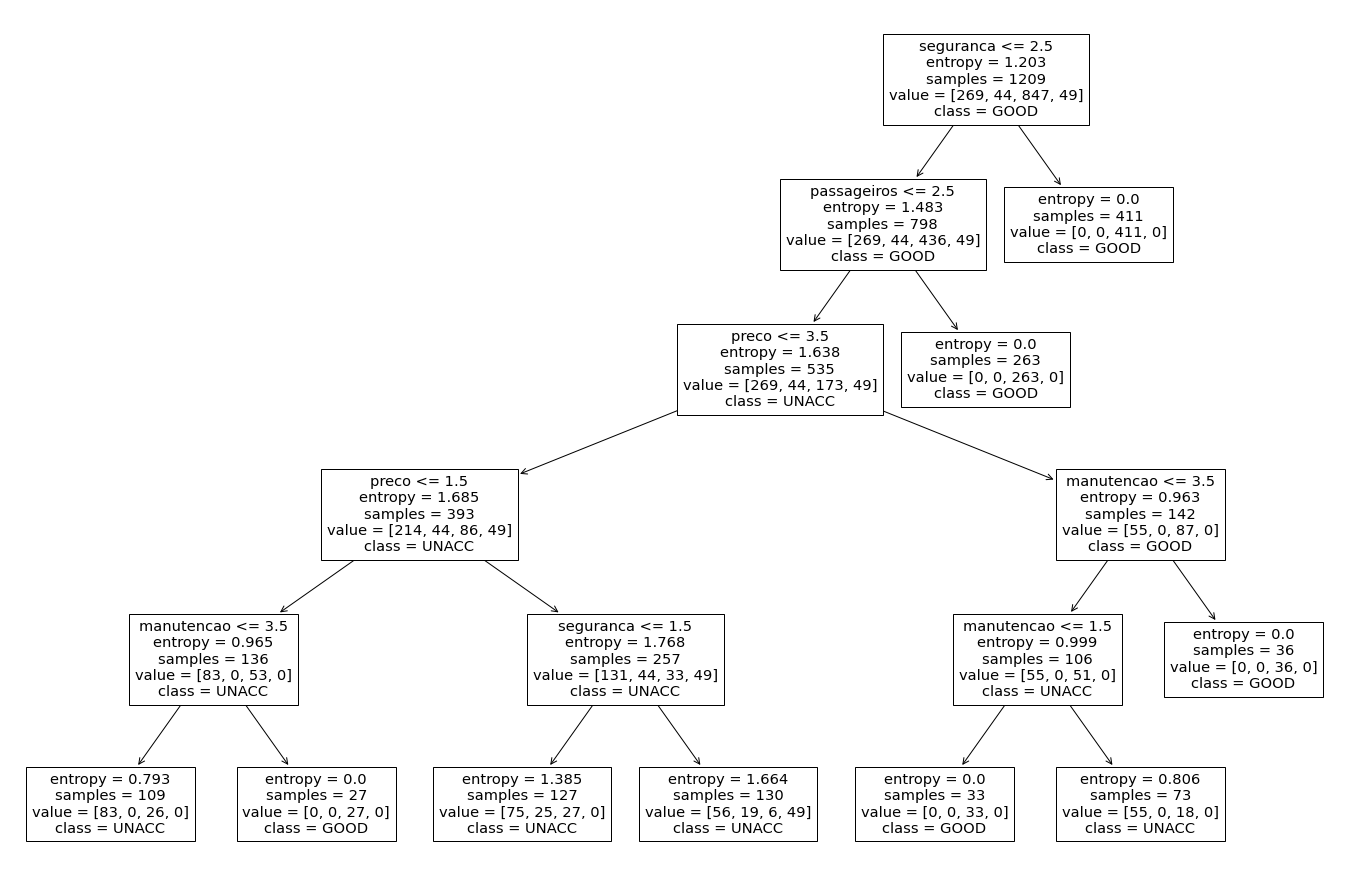

In [38]:
# Visualizando a Árvode de Decisão
plt.figure(figsize=(24, 16))

a = tree.plot_tree(clf, feature_names = X_train.columns, 
                   class_names = ['UNACC','ACC','GOOD','VGOOD'])
plt.show()